## Create visualizations for both walking speed and cost analyses.

In [4]:
# import libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load dataset
data = pd.read_csv('processed_ms_data.csv')

#ensure proper data types 
data['education_level'] = data['education_level'].astype('category')
data['visit_date'] = pd.to_datetime(data['visit_date'])

#set up seaborn aesthetic
sns.set_theme(style='whitegrid')

#### 1. Walking speed analysis:
 - Scatter plot of age vs walking speed with regression line
 - Box plots by education level
 - Line plot showing education age interaction

<Figure size 800x600 with 0 Axes>

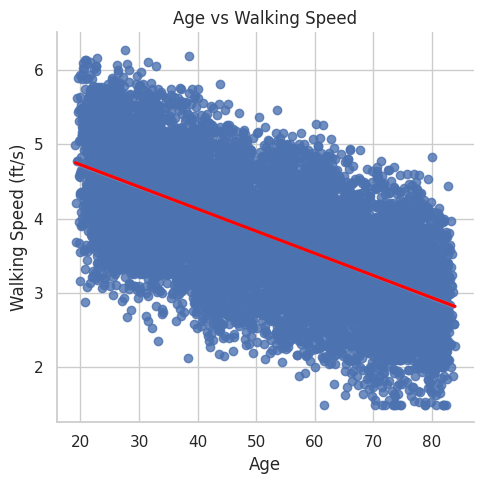

In [11]:
# 1. Walking Speed Analysis

# Scatter plot: Age vs Walking Speed with regression line
plt.figure(figsize=(8, 6))
sns.lmplot(x='age', y='walking_speed', data=data, line_kws={'color': 'red'})
plt.title('Age vs Walking Speed')
plt.xlabel('Age')
plt.ylabel('Walking Speed (ft/s)')
plt.tight_layout()
plt.savefig('scatter_age_walking_speed.png')
plt.show()


/tmp/ipykernel_5172/106688182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education_level', y='walking_speed', data=data, palette="Set2")


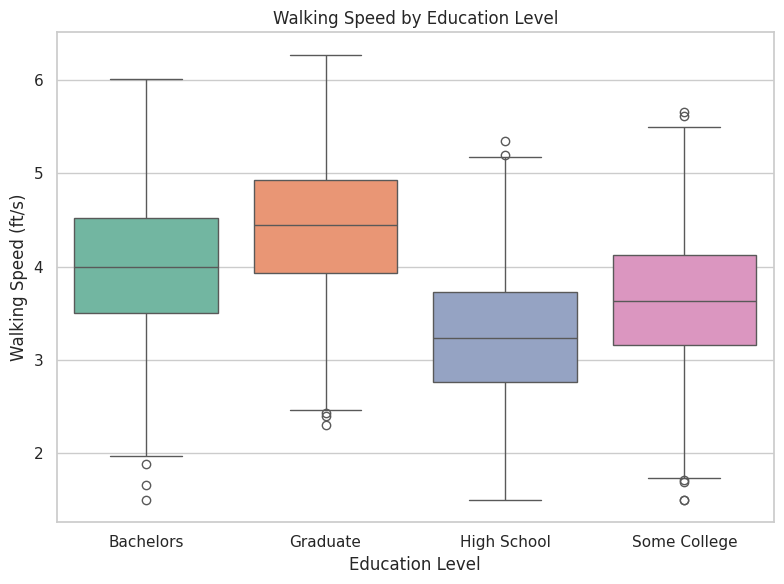

In [12]:

# Box plot: Walking Speed by Education Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='education_level', y='walking_speed', data=data, palette="Set2")
plt.title('Walking Speed by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Walking Speed (ft/s)')
plt.tight_layout()
plt.savefig('boxplot_walking_speed_education.png')
plt.show()


/tmp/ipykernel_5172/1398474673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_data = data.groupby(['education_level', 'age'])[['walking_speed']].mean().reset_index()


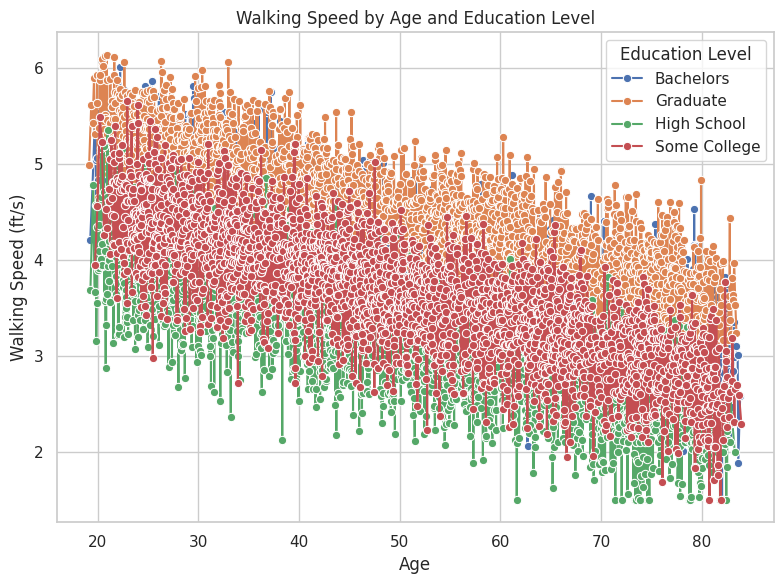

In [13]:
# Line plot: Education-Age Interaction
interaction_data = data.groupby(['education_level', 'age'])[['walking_speed']].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='walking_speed', hue='education_level', data=interaction_data, marker="o")
plt.title('Walking Speed by Age and Education Level')
plt.xlabel('Age')
plt.ylabel('Walking Speed (ft/s)')
plt.legend(title='Education Level')
plt.tight_layout()
plt.savefig('lineplot_age_education_interaction.png')
plt.show()

##### Cost analysis:
 - Bar plot of mean costs by insurance type
 - Box plots showing cost distributions
 - Add error bars or confidence intervals

/tmp/ipykernel_5172/471203811.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='insurance_type', y='visit_cost', data=data, ci=95, palette="Set3")
/tmp/ipykernel_5172/471203811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='insurance_type', y='visit_cost', data=data, ci=95, palette="Set3")


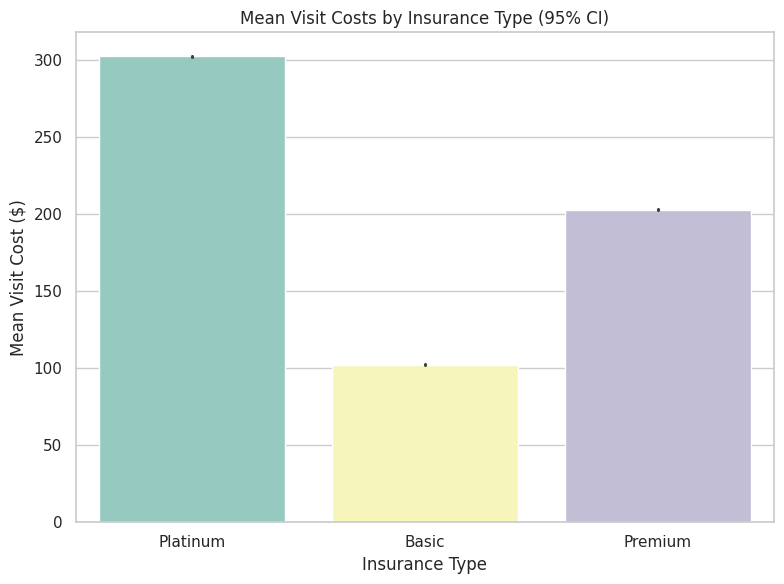

In [14]:
# Bar plot: Mean Costs by Insurance Type with error bars (95% Confidence Interval)
plt.figure(figsize=(8, 6))
sns.barplot(x='insurance_type', y='visit_cost', data=data, ci=95, palette="Set3")
plt.title('Mean Visit Costs by Insurance Type (95% CI)')
plt.xlabel('Insurance Type')
plt.ylabel('Mean Visit Cost ($)')
plt.tight_layout()
plt.savefig('barplot_mean_costs_insurance.png')
plt.show()


/tmp/ipykernel_5172/3410283797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='insurance_type', y='visit_cost', data=data, palette="Set2")


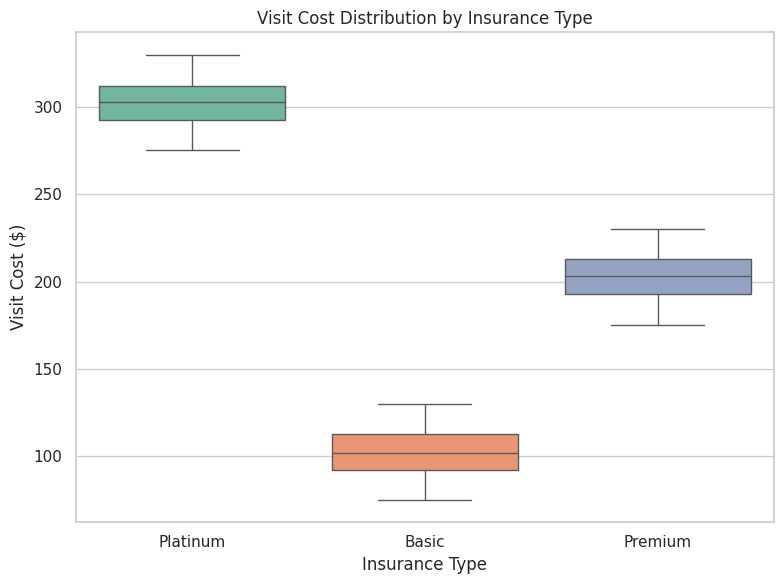

In [15]:
# Box plot: Cost Distribution by Insurance Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='insurance_type', y='visit_cost', data=data, palette="Set2")
plt.title('Visit Cost Distribution by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Visit Cost ($)')
plt.tight_layout()
plt.savefig('boxplot_cost_insurance.png')
plt.show()

##### 3. Combined visualizations
 - pair plots of key variables
 - faceted plots by education/insurance
 - time trends where relevant

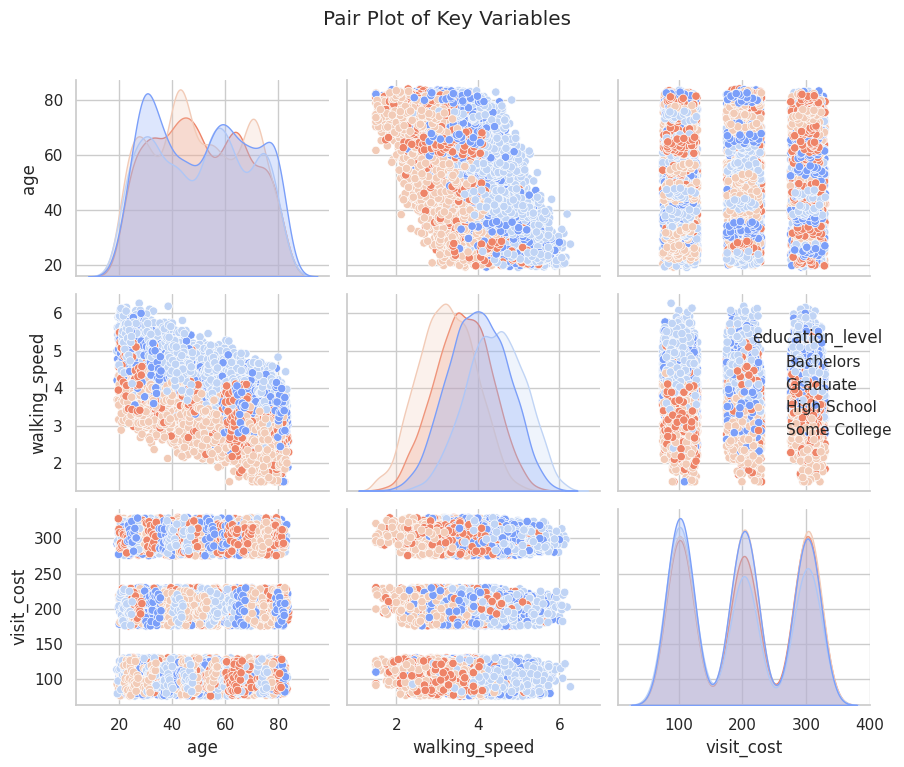

In [16]:
# Pair plot: Key variables (age, walking_speed, visit_cost) colored by education level
sns.pairplot(
    data[['age', 'walking_speed', 'visit_cost', 'education_level']],
    hue='education_level',
    palette='coolwarm',
    diag_kind='kde',
    height=2.5
)
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.tight_layout()
plt.savefig('pairplot_key_variables.png')
plt.show()

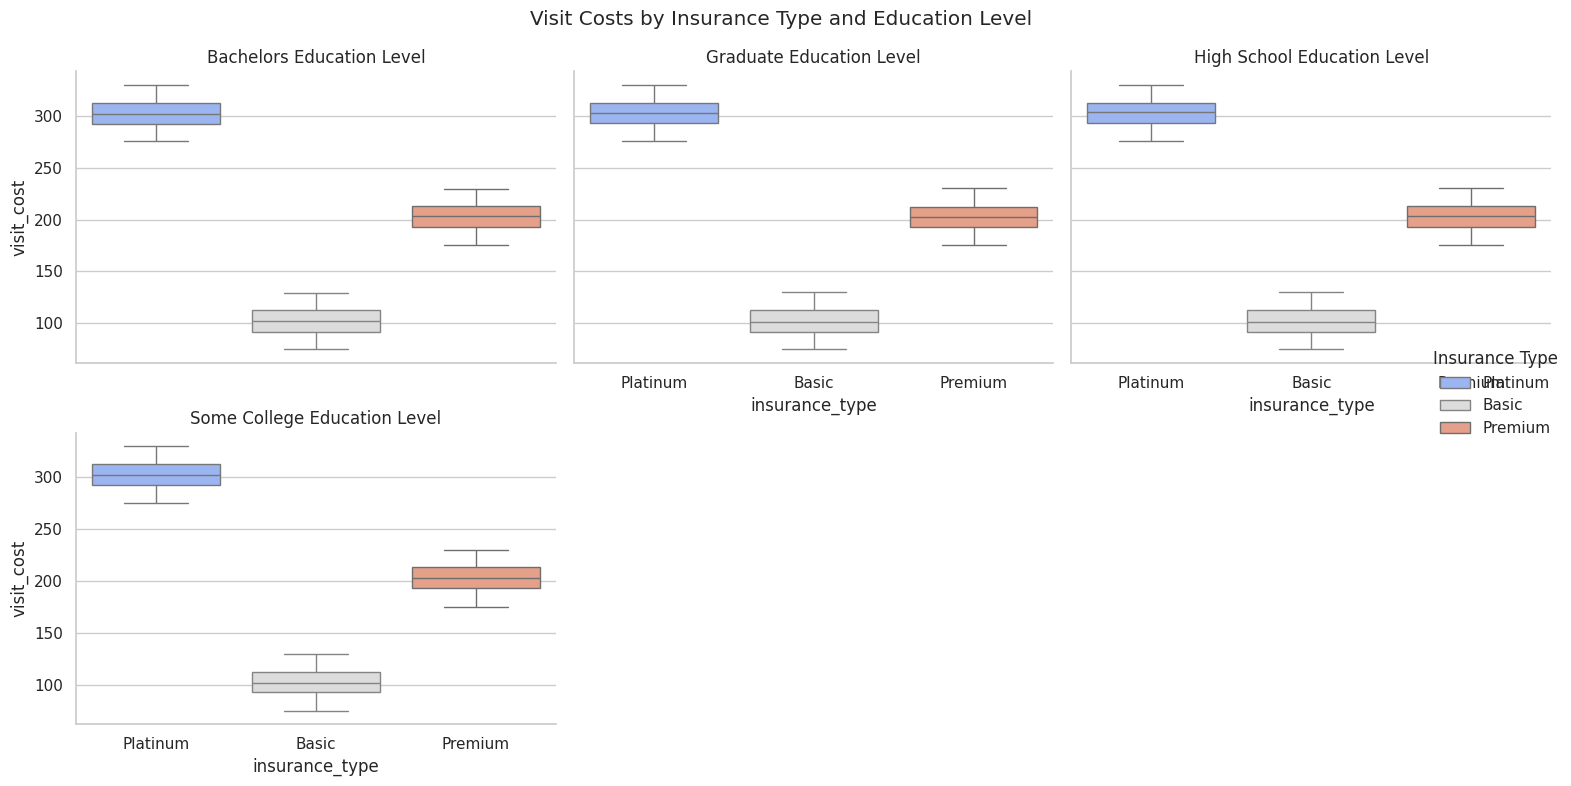

In [17]:
# Faceted Plots: Cost by Insurance Type and Education Level
g = sns.FacetGrid(
    data, 
    col='education_level', 
    hue='insurance_type', 
    palette="coolwarm", 
    height=4, 
    aspect=1.2, 
    col_wrap=3
)
g.map(sns.boxplot, 'insurance_type', 'visit_cost', order=data['insurance_type'].unique())
g.add_legend(title='Insurance Type')
g.set_titles("{col_name} Education Level")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Visit Costs by Insurance Type and Education Level')
plt.tight_layout()
plt.savefig('faceted_costs_insurance_education.png')
plt.show()

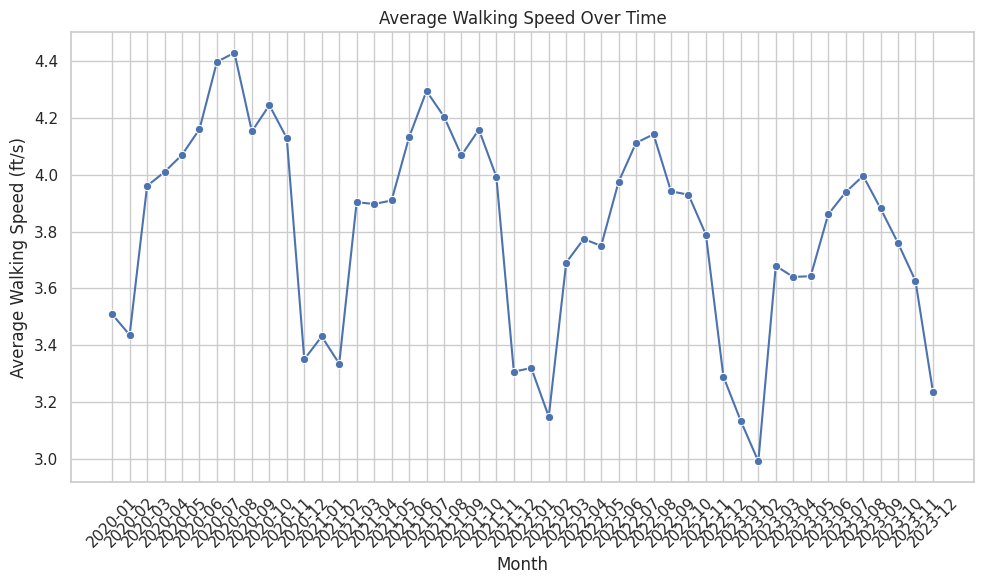

In [18]:
# Time Trends: Average Walking Speed Over Time (Month)
data['month'] = data['visit_date'].dt.to_period('M')
time_trend_data = data.groupby('month')['walking_speed'].mean().reset_index()
time_trend_data['month'] = time_trend_data['month'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='walking_speed', data=time_trend_data, marker='o')
plt.xticks(rotation=45)
plt.title('Average Walking Speed Over Time')
plt.xlabel('Month')
plt.ylabel('Average Walking Speed (ft/s)')
plt.tight_layout()
plt.savefig('time_trend_walking_speed.png')
plt.show()